# Students Social Media Addiction Analysis

This mini-report analyzes social media addiction among students from various countries, exploring its impact on academic performance and platform preferences.

## Importing Libraries and Dataset


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

FILE_PATH = r'../datasets/students_social_media_addiction.csv'
dataset = pd.read_csv(FILE_PATH)

## 1. Data Cleaning
Remove rows with missing values to ensure data quality.
python

In [73]:
cleaned_dataset = dataset.dropna()
cleaned_dataset.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [74]:
addiction_scores = cleaned_dataset['Addicted_Score'].values
usage_hours = cleaned_dataset['Avg_Daily_Usage_Hours'].values


normalized_scores = (addiction_scores - np.min(addiction_scores)) / (np.max(addiction_scores) - np.min(addiction_scores))
cleaned_dataset['Normalized_Score'] = normalized_scores

combined_feature = addiction_scores * usage_hours 
cleaned_dataset['Score_x_Usage'] = combined_feature

score_series = pd.Series(normalized_scores, name='Normalized_Score')
usage_series = pd.Series(usage_hours, name='Usage_Hours')

cleaned_dataset.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Normalized_Score,Score_x_Usage
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,0.857143,41.6
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,0.142857,6.3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,1.000000,54.0
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,0.285714,12.0
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,0.714286,31.5


## 2. Overview of Addiction Scores by Country
Group and sort countries by their total addiction score.

In [75]:
country_scores = cleaned_dataset.groupby('Country')['Addicted_Score'].sum().sort_values(ascending=False)
country_scores = country_scores.reset_index()
country_scores.head(10)

,Country,Addicted_Score
0,India,398
1,USA,344
2,Canada,228
3,Mexico,199
4,Turkey,198
5,Spain,197
6,Ireland,174
7,UK,159
8,Bangladesh,150
9,Pakistan,141


## 3. Visualize Top 10 Countries by Total Addiction Score

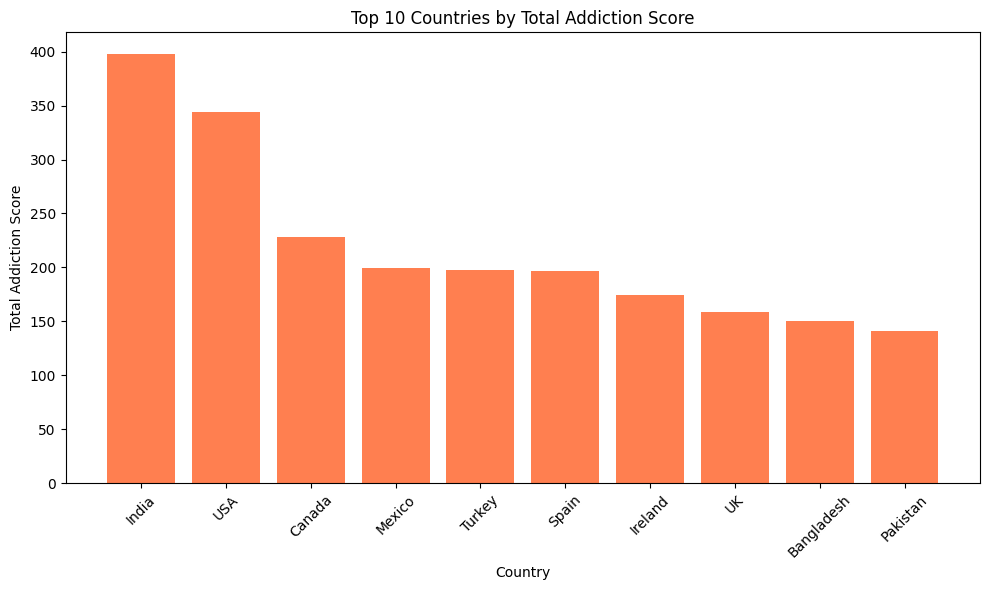

In [76]:
top_10 = country_scores.head(10)
plt.figure(figsize=(10,6))
plt.bar(top_10['Country'], top_10['Addicted_Score'], color='coral')
plt.title('Top 10 Countries by Total Addiction Score')
plt.xlabel('Country')
plt.ylabel('Total Addiction Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Distribution of Addiction Scores
Visualize the distribution of addiction scores among students.

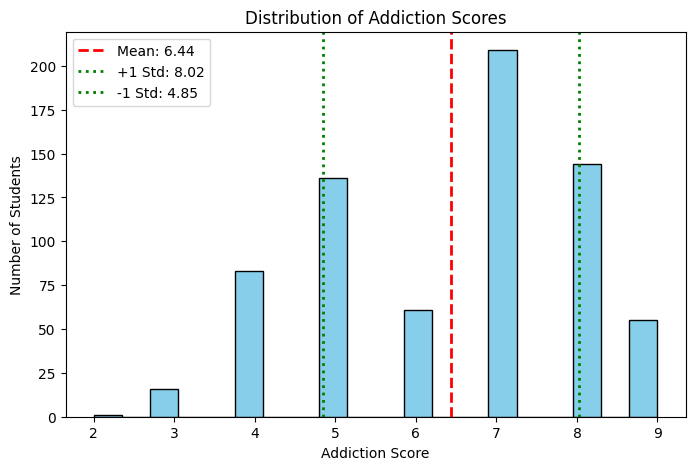

Mean Addiction Score: 6.44
Standard Deviation: 1.59


In [77]:
import numpy as np

mean_score = np.mean(cleaned_dataset['Addicted_Score'])
std_score = np.std(cleaned_dataset['Addicted_Score'])

plt.figure(figsize=(8,5))
plt.hist(cleaned_dataset['Addicted_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Addiction Scores')
plt.xlabel('Addiction Score')
plt.ylabel('Number of Students')
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_score:.2f}')
plt.axvline(mean_score + std_score, color='green', linestyle='dotted', linewidth=2, label=f'+1 Std: {mean_score + std_score:.2f}')
plt.axvline(mean_score - std_score, color='green', linestyle='dotted', linewidth=2, label=f'-1 Std: {mean_score - std_score:.2f}')
plt.legend()
plt.show()

print(f"Mean Addiction Score: {mean_score:.2f}")
print(f"Standard Deviation: {std_score:.2f}")

## 5. Relationship Between Daily Usage and Addiction Score
Scatter plot to explore the correlation.

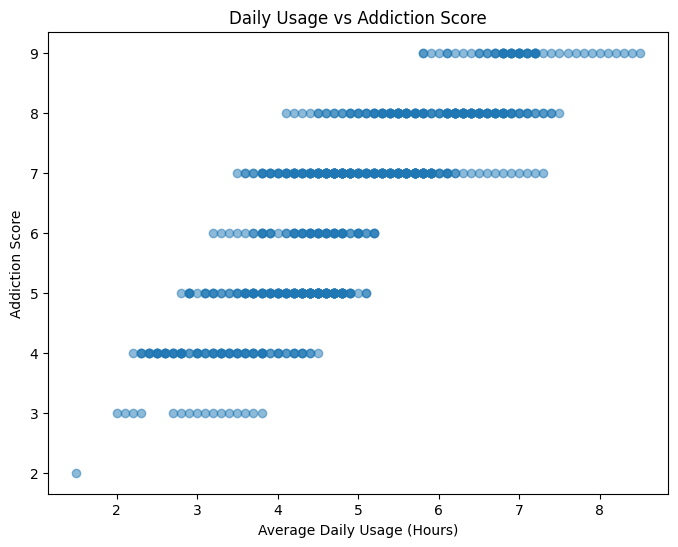

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(cleaned_dataset['Avg_Daily_Usage_Hours'], cleaned_dataset['Addicted_Score'], alpha=0.5)
plt.title('Daily Usage vs Addiction Score')
plt.xlabel('Average Daily Usage (Hours)')
plt.ylabel('Addiction Score')
plt.show()

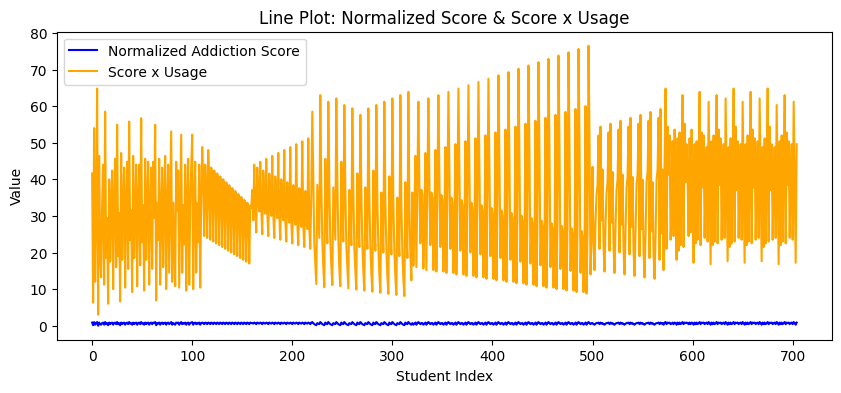

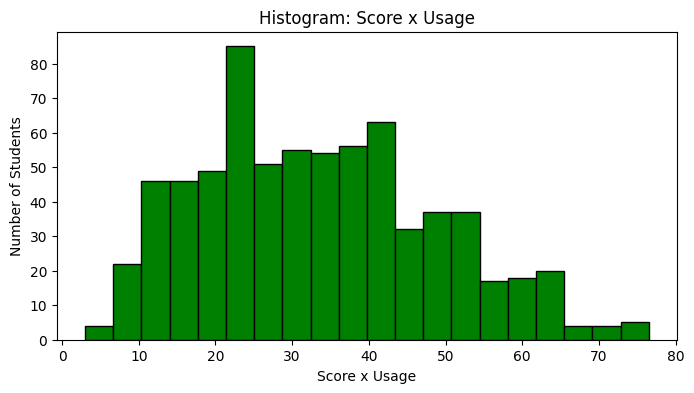

In [79]:
plt.figure(figsize=(10,4))
plt.plot(cleaned_dataset['Normalized_Score'], label='Normalized Addiction Score', color='blue')
plt.plot(cleaned_dataset['Score_x_Usage'], label='Score x Usage', color='orange')
plt.title('Line Plot: Normalized Score & Score x Usage')
plt.xlabel('Student Index')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.hist(cleaned_dataset['Score_x_Usage'], bins=20, color='green', edgecolor='black')
plt.title('Histogram: Score x Usage')
plt.xlabel('Score x Usage')
plt.ylabel('Number of Students')
plt.show()


## 6. Most Used Social Media Platforms
Bar chart of most used platforms among students.

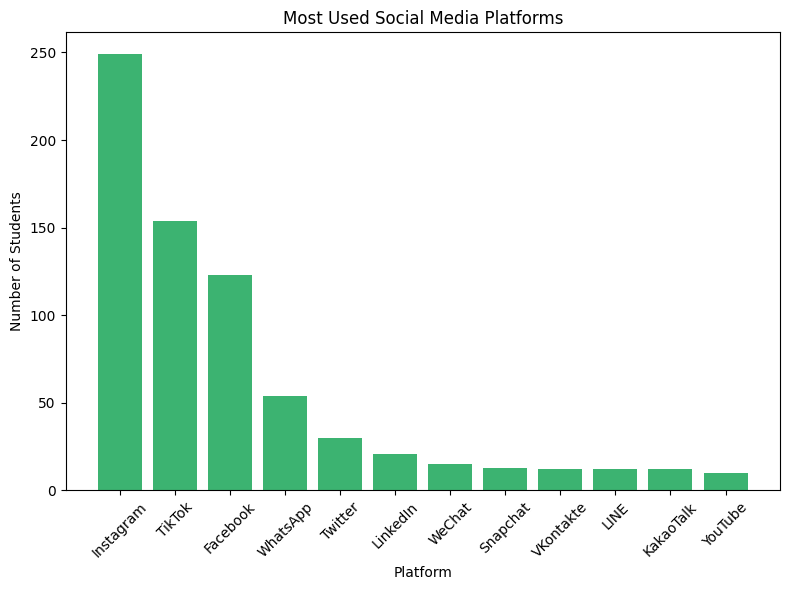

In [80]:
platform_counts = cleaned_dataset['Most_Used_Platform'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(platform_counts.index, platform_counts.values, color='mediumseagreen')
plt.title('Most Used Social Media Platforms')
plt.xlabel('Platform')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Academic Performance vs Addiction
Pie chart showing proportion of students whose academic performance is affected by social media addiction.

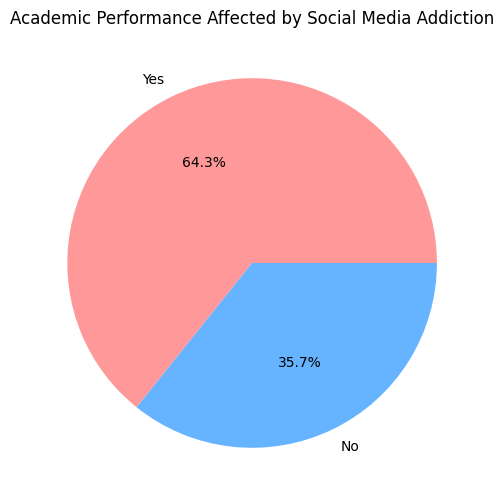

In [81]:
affected_counts = cleaned_dataset['Affects_Academic_Performance'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(affected_counts, labels=affected_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Academic Performance Affected by Social Media Addiction')
plt.show()

## 8. Insights and Recommendations

**Key Findings:**
- Countries with the highest total addiction scores may need targeted interventions.
- High daily usage correlates with higher addiction scores.
- Instagram and TikTok are the most popular platforms among students.
- A significant proportion of students report academic performance being affected.


**Recommendations:**
- Promote awareness campaigns in high-risk countries.
- Encourage healthy social media habits.
- Provide support for students struggling with addiction.

## Conclusion

This analysis highlights the prevalence of social media addiction among students and its impact on academic performance. Key recommendations include:
- Promoting awareness campaigns in high-risk countries
- Encouraging healthy social media habits
- Providing support for students struggling with addiction